# User Data Analysis

In [1]:
#packages
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

## Rigid body position heatmap

In [2]:
#FUNCTION DEFINITIONS

from mpl_toolkits.axes_grid1 import make_axes_locatable

def filterData(user_data, tag, startTime):
    data = user_data.loc[user_data['start'].str.contains(tag)]
    data = data.start.str.split(pat=' ',expand=True)
    data = data[data[0].astype(float) > startTime]
    return data
    
def generateHeatmapData(data, idx_x, idx_y, idx_z, limit, step):    
    heatsize = int(limit * 2 / step)
    heatmap_x_y = np.zeros( (heatsize, heatsize) , dtype=np.int64)#2.5 meters, 2500 mm x 2500 mm
    heatmap_x_z = np.zeros( (heatsize, heatsize) , dtype=np.int64)
    for index, row in data.iterrows():
        x = float(row[idx_x])
        y = float(row[idx_y])
        z = float(row[idx_z])
        if (x >= -limit) and (x <= limit) and (y >= -limit) and (y <= limit) and (z >= -limit) and (z <= limit):
            i = int((x + limit) / step)
            j = int((y + limit) / step)
            k = int((z + limit) / step)
            heatmap_x_y[j][i] += 1
            heatmap_x_z[k][i] += 1
    return heatmap_x_y, heatmap_x_z

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def createIndividualHeatmap(data, limitNumber, fig, ax, hAxisName, vAxisname, hColor, vColor, cmap):
    plot = ax.imshow(NormalizeData(data), extent=[-limitNumber, limitNumber, limitNumber,- limitNumber], cmap=cmap)
    ax.invert_yaxis()
    fig.set_facecolor('white')
    ax.grid(visible = True, axis = 'y', color = 'w')
    ax.grid(visible = True, axis = 'x', color = 'w')
    arrowSize = 0.2
    ax.arrow(0, 0, arrowSize, 0, width = 0.02, color = hColor)
    ax.arrow(0, 0, 0, arrowSize, width = 0.02, color = vColor)
    ax.set_xlabel('Meters ' + hAxisName)
    ax.set_ylabel('Meters '+ vAxisname)  
    return plot

def createRoomHeatmap(heatmap_x_y, heatmap_x_z, cmap, limit):
    #print(heatmap_x_y.shape)
    plt.style.use('classic')
    #plt.rcParams.update(plt.rcParamsDefault)    
    boundary = limit / 1000 #hack -0.5

    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    plot0 = createIndividualHeatmap(heatmap_x_y, boundary, fig, axs[0], 'X', 'Y', 'red', 'lime', cmap)
    plot1 = createIndividualHeatmap(heatmap_x_z, boundary, fig, axs[1], 'X', 'Z', 'red', 'blue', cmap)
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes("right", size="5%", pad= 0.05)   
    plt.colorbar(plot1, cax=cax)
    plt.show()

    plt.rcParams.update(plt.rcParamsDefault)

In [3]:
# User data and start time
user_data = pd.read_csv('./FinalDatasets/users/user-2.txt')
start_data = user_data.loc[user_data['start'].str.contains('globalstart')]# if not it assumes it is all data BE CAREFUL HERE
startTime = 0
if start_data.shape[0] > 0:
    startTime = float(start_data.values[0][0].split()[0])
    print('Start Time: ' + str(startTime))
    
limit = 3000
step = 200
    

Start Time: 4461335.61


<Figure size 640x480 with 0 Axes>

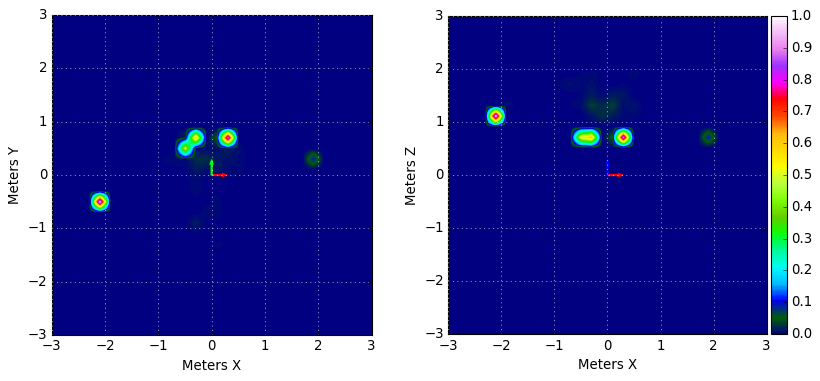

<Figure size 640x480 with 0 Axes>

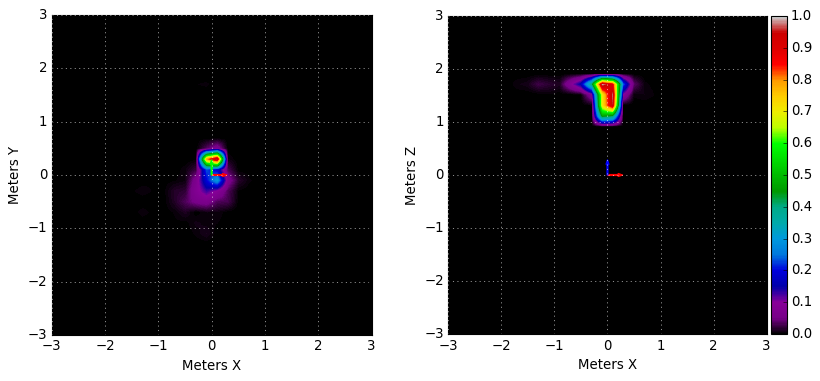

In [17]:
# MOCAP data

mocap_data = filterData(user_data, 'mocap', startTime)
heatmap_x_y, heatmap_x_z = generateHeatmapData(mocap_data, 2, 3, 4, limit, step)    
createRoomHeatmap(heatmap_x_y, heatmap_x_z, 'gist_ncar', limit)

# HOLO data

holo_data = filterData(user_data, 'holo', startTime)
holo_posdir_data = holo_data.loc[holo_data[2].str.contains('/gazedir')]

#pos: 3, 4, 5 dir:6, 7, 8 
heatmap_x_y, heatmap_x_z = generateHeatmapData(holo_posdir_data, 3, 4, 5, limit, step)    
createRoomHeatmap(heatmap_x_y, heatmap_x_z, 'nipy_spectral', limit)


<Figure size 640x480 with 0 Axes>

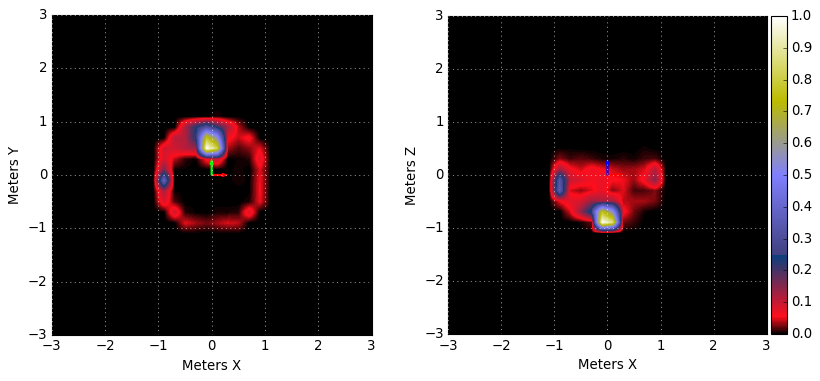

In [16]:
#pos: 3, 4, 5 dir:6, 7, 8 
heatmap_x_y, heatmap_x_z = generateHeatmapData(holo_posdir_data, 6, 7, 8, limit, step)    
createRoomHeatmap(heatmap_x_y, heatmap_x_z, 'gist_stern', limit)

In [19]:
agents_data = filterData(user_data, 'agents', startTime)
agents_data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
2433,4461371.047,agents,0,0,-460,653,740,0,None,None,...,None,None,None,None,None,None,None,None,None,None
2435,4461391.146,agents,0,0,-460,653,740,0,None,None,...,None,None,None,None,None,None,None,None,None,None
2437,4461421.479,agents,0,0,-460,653,740,0,None,None,...,None,None,None,None,None,None,None,None,None,None
2439,4461451.828,agents,0,0,-460,653,740,0,None,None,...,None,None,None,None,None,None,None,None,None,None
2441,4461485.669,agents,0,0,-460,653,740,0,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191633,6729185.515,agents,0,1,251,646,732,7,1,-2398,...,-757,1596,7,-2438,-424,1639,None,None,None,None
191635,6729210.697,agents,0,1,251,646,732,7,1,-2395,...,-767,1596,7,-2416,-418,1639,None,None,None,None
191637,6729241.774,agents,0,1,251,646,732,7,1,-2392,...,-776,1596,7,-2394,-412,1639,None,None,None,None
191639,6729272.240,agents,0,1,251,646,732,7,1,-2390,...,-785,1596,7,-2371,-405,1639,None,None,None,None
